# Explorative Data Analysis of a UFC Master Dataset

### Description
I developed this project to explore my explorative data analysis skillset in Python. The dataset is from [Kaggle: The Ultimate UFC Dataset](https://www.kaggle.com/datasets/bloodprashure/ufc-p4p-1-dataset?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter).

As a UFC fight fan and a trained martial artist, I thought it would be exciting to explore this data to see what I will discover.

I have a bunch of thesis questions that I would like to find out:

## Things I would like to explore

Make nice visualizations with humanoid shapes

1. I want to categorize it into male and female
2. What is the total number of unique fighters and what is their number win, loss and draw against their total number of fights
3. For each unique fighter I want to know how many weight divisions they have fought
4. How many fighters lost by disqualification and what was the reason
5. I want to know how many submission attempts was required before the submission and what was the control time and the total fight time.
6. I would like to know if overtime the amount of takedowns increases since as the fighters become tired, they tend to go for takedowns. Although not all fighters that increase their takedown attempt do it because they are tired. 
7. the countries versus titles



### 1. The first step is to import all the useful libraries

In [75]:
#Import all useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%matplotlib widget


### 2. Then read the dataset into python and view the head of the dataset

In [76]:
#read the csv file into pandas dataframe
ufc_master = pd.read_csv('ufc-master.csv')

#view the columns that are in the datafrane
print(ufc_master.columns)

#View the first 5 rows of the dataset
print(ufc_master.head())

Index(['Unnamed: 0', 'Date', 'Event-Code', 'Event-Name', 'Full Name',
       'Fighter-2-Name', 'W', 'L', 'D', 'NC',
       ...
       'Round-5-Takedown-Percent', 'Round-5-Submission-Attempt',
       'Round-5-Submission-Reverse', 'Round-5-Control-Time', 'Round-5-Head',
       'Round-5-Body', 'Round-5-Leg', 'Round-5-Distance', 'Round-5-Clinch',
       'Round-5-Ground'],
      dtype='object', length=171)
   Unnamed: 0                 Date        Event-Code  \
0           0  2021-03-06 00:00:00  6e2b1d631832921d   
1           1  2020-02-29 00:00:00  fc9a9559a05f2704   
2           2  2000-11-17 00:00:00  da6dfd09cca1d705   
3           3  2014-08-23 00:00:00  063649e21bc9d6d5   
4           4  2020-07-15 00:00:00  18f5669a92e99d92   

                                  Event-Name       Full Name   Fighter-2-Name  \
0           UFC 259: Blachowicz vs. Adesanya      Aalon Cruz       Uros Medic   
1  UFC Fight Night: Benavidez vs. Figueiredo      Aalon Cruz    Spike Carlyle   
2              

### 3. Drop some columns that are irrelevant to the thesis questions.

I will be dropping the following columns from the ufc_master dataframe: 
event code, event name,fight city, fight state,ppv sales, age-days, judge-k-name,judge-k-score,Fight-Bonus, performance-Bonus, KO-Bonus, submission-Bonus, Fighter-Active-Status, Fight-City, Fight-State, Fight-Country, PPV-Sales. 

In [77]:
columns_to_drop = ['Event-Code','Event-Name','Judge-1-Name','Judge-1-Score','Judge-2-Name','Judge-2-Score','Judge-3-Name','Judge-3-Score'\
                   ,'Fight-Bonus','Performance-Bonus','KO-Bonus','Submission-Bonus'\
                   ,'Fighter-Active-Status','Fight-City','Fight-State','Fight-Country'\
                   ,'PPV-Sales']
print((ufc_master.columns))
ufc_master.drop(columns_to_drop,axis=1,inplace=True)
print((ufc_master.columns))
#WOmen weight classes = ['Featherweight', 'bantamweight','flyweight','straweight']
#Men = ['Heavyweight','light heavyweight','middleweight','welterweight','lightweight', 'featherweight','bantamweight','Flyweight']


Index(['Unnamed: 0', 'Date', 'Event-Code', 'Event-Name', 'Full Name',
       'Fighter-2-Name', 'W', 'L', 'D', 'NC',
       ...
       'Round-5-Takedown-Percent', 'Round-5-Submission-Attempt',
       'Round-5-Submission-Reverse', 'Round-5-Control-Time', 'Round-5-Head',
       'Round-5-Body', 'Round-5-Leg', 'Round-5-Distance', 'Round-5-Clinch',
       'Round-5-Ground'],
      dtype='object', length=171)
Index(['Unnamed: 0', 'Date', 'Full Name', 'Fighter-2-Name', 'W', 'L', 'D',
       'NC', 'KO/TKO', 'Submission',
       ...
       'Round-5-Takedown-Percent', 'Round-5-Submission-Attempt',
       'Round-5-Submission-Reverse', 'Round-5-Control-Time', 'Round-5-Head',
       'Round-5-Body', 'Round-5-Leg', 'Round-5-Distance', 'Round-5-Clinch',
       'Round-5-Ground'],
      dtype='object', length=154)


### 4. Next, rename some of the dataframe's column name for easy access

In [78]:
columns_to_rename = {'Unnamed: 0':'Index','Women\'s-Bout':'Women_Category','Full Name':'Full_Name','Fighter-2-Name':'Fighter_2'\
                    ,'KO/TKO':'KO_TKO','TKO - Doctor\'s Stoppage':'TKO_Doctor_Stoppage'}
ufc_master.rename(columns=columns_to_rename,inplace=True)
# ufc_master.set_index('Index',inplace=True)
print(ufc_master.head())
ufc_master.columns

   Index                 Date       Full_Name        Fighter_2  W  L  D  NC  \
0      0  2021-03-06 00:00:00      Aalon Cruz       Uros Medic  0  1  0   0   
1      1  2020-02-29 00:00:00      Aalon Cruz    Spike Carlyle  0  1  0   0   
2      2  2000-11-17 00:00:00     Aaron Brink  Andrei Arlovski  0  1  0   0   
3      3  2014-08-23 00:00:00  Aaron Phillips       Matt Hobar  0  1  0   0   
4      4  2020-07-15 00:00:00  Aaron Phillips       Jack Shore  0  1  0   0   

   KO_TKO  Submission  ...  Round-5-Takedown-Percent  \
0       1           0  ...                         0   
1       1           0  ...                         0   
2       0           1  ...                         0   
3       0           0  ...                         0   
4       0           1  ...                         0   

   Round-5-Submission-Attempt  Round-5-Submission-Reverse  \
0                           0                           0   
1                           0                           0   
2    

Index(['Index', 'Date', 'Full_Name', 'Fighter_2', 'W', 'L', 'D', 'NC',
       'KO_TKO', 'Submission',
       ...
       'Round-5-Takedown-Percent', 'Round-5-Submission-Attempt',
       'Round-5-Submission-Reverse', 'Round-5-Control-Time', 'Round-5-Head',
       'Round-5-Body', 'Round-5-Leg', 'Round-5-Distance', 'Round-5-Clinch',
       'Round-5-Ground'],
      dtype='object', length=154)

### 5. Now, we need to seperate the fighters into the male and female categories

The Women_Category column is useful for this process.

Please note: I had already performed the process of seperating the fights into the male and female categories. Then I realized that there were some female names in the male category; upon close inspection, I discovered that some of the data for the 'Women_Category' column had been mislabelled at rows [444, 2349, 2352, 7066, 7098, 10388]. So, I had to come back to fix them at the begining of the process of seperating the male and female fights.

1994 2021
<class 'pandas.core.series.Series'>
RangeIndex: 12156 entries, 0 to 12155
Series name: Full_Name
Non-Null Count  Dtype 
--------------  ----- 
12156 non-null  object
dtypes: object(1)
memory usage: 95.1+ KB
None
11186
970
12156


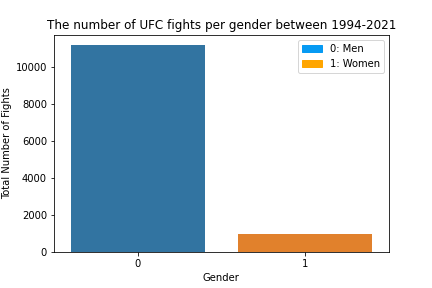

Between 1994-2021, Male fights account for 92.02% of the whole UFC Fights, while female fights account for only 7.98% 


In [79]:
#Fixing the mislabelled data
row_mislabel = [444, 2349, 2352, 7066, 7098, 10388] 
for i in row_mislabel:
    ufc_master.at[i, 'Women_Category']=1

#Convert date to datetime using pandas
ufc_master['Date'] = pd.to_datetime(ufc_master['Date'])
# print(ufc_master.Date.dt.day.head())
# print(ufc_master.Date.dt.month.head())
ufc_master['Year'] = ufc_master['Date'].dt.year
min_date = ufc_master['Date'].dt.year.min()
max_date = ufc_master['Date'].dt.year.max()

print(min_date,max_date)
    
    
#Now,Let's Seperate the male and female fights
male_fights = ufc_master[ufc_master['Women_Category'] ==0]
female_fights = ufc_master[ufc_master['Women_Category'] ==1]
print(ufc_master['Full_Name'].info())
print(len(male_fights))
print(len(female_fights))
print(len(ufc_master))


#Visualize the proportion of male fights versus female fights
plt.figure(facecolor='w', edgecolor='w')
sns.countplot(data=ufc_master,x='Women_Category')
plt.title(f'The number of UFC fights per gender between {min_date}-{max_date}')
blue_patch = mpatches.Patch(color='xkcd:azure', label='0: Men')
orange_patch = mpatches.Patch(color='orange', label='1: Women')
plt.ylabel('Total Number of Fights')
plt.xlabel('Gender')
plt.legend(handles=[blue_patch, orange_patch])
# plt.savefig('Count_of_Male_Fights_And_Female_Fights.png')
plt.show()
# plt.clf()


print(f'Between {min_date}-{max_date}, Male fights account for {round(100*len(male_fights)/len(ufc_master),3)}% of the whole UFC Fights, while female fights account for only {round(100*len(female_fights)/len(ufc_master),3)}% ')

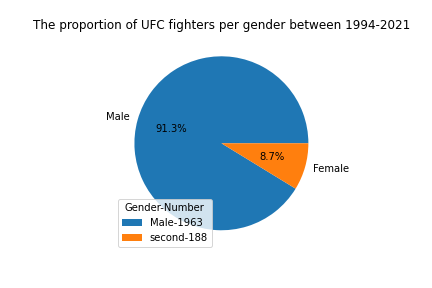

There were 1963 male fighters and 188 female fighters in the UFC between 1994-2021


In [80]:
##Next, let's get the number of unique fighters across each gender
#Get the number of unique fighters 
full_name_unique = ufc_master['Full_Name'].unique()
# print(len(full_name_unique))

male_fighters_unique = male_fights['Full_Name'].unique()
# print(len(male_fighters_unique))

female_fighters_unique = female_fights['Full_Name'].unique()
# print(len(female_fighters_unique))

#Store the count in a dictionary for easy visualization
fighters_count_dict = {'Male': len(male_fighters_unique),'Female':len(female_fighters_unique)}
names = list(fighters_count_dict.keys())
values = list(fighters_count_dict.values())

#Visualize the proportion of male fighters versus female fighters
plt.figure(facecolor='w', edgecolor='w')
plt.pie(x=values, labels=names,autopct='%.1f%%')
plt.title(f'The proportion of UFC fighters per gender between {min_date}-{max_date}')
plt.legend([f'Male-{len(male_fighters_unique)}',f'second-{len(female_fighters_unique)}'],title='Gender-Number',loc='lower left')
plt.show()

# # plt.bar(range(len(fighters_count_dict)), values, tick_label=names)
# plt.title(f'The number of UFC fighters per gender between {min_date}-{max_date}')
# # plt.ylabel('Number of Fighters')
# plt.show()
print(f'There were {len(male_fighters_unique)} male fighters and {len(female_fighters_unique)} female fighters in the UFC between {min_date}-{max_date}')



The huge difference between the proportion of fights across the male and female gender and the number of fighters across both divisions suggest that the UFC's MMA world is largely dominated by Men.

I personally believe that this creates a massive opportunity for women to explore this area of sports, since their fight category is less populated and less competitive.

To further investigate this, let's see the trend of fighters over the years.

Year
1994     58
1995     68
1996     72
1997     78
1998     42
1999     88
2000     86
2001     80
2002    106
2003     82
2004     78
2005    160
2006    316
2007    342
2008    402
2009    430
2010    506
2011    600
2012    682
2013    740
2014    944
2015    858
2016    882
2017    788
2018    802
2019    848
2020    750
2021    298
Name: Women_Category, dtype: int64
Year
2013     32
2014     62
2015     88
2016    104
2017    126
2018    146
2019    184
2020    162
2021     66
Name: Women_Category, dtype: int64


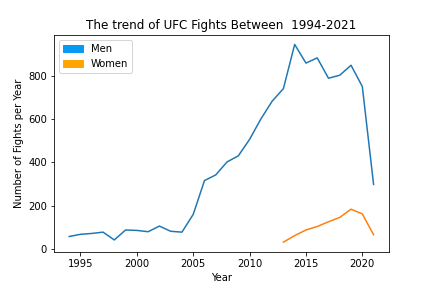

In [81]:
#Let's groupby Date and Women_Category
#group year and male fights
male_group = (male_fights.groupby('Year').Women_Category.count())
plt.figure(facecolor='w', edgecolor='w')
plt.plot(male_group.index,male_group.values	)
print(male_group)
# plt.clf()

#group year and female fights
female_group = (female_fights.groupby('Year').Women_Category.count())

plt.plot(female_group.index,female_group.values	)
plt.xlabel('Year')
plt.ylabel('Number of Fights per Year')
plt.title(f'The trend of UFC Fights Between  {min_date}-{max_date}')
blue_patch = mpatches.Patch(color='xkcd:azure', label='Men')
orange_patch = mpatches.Patch(color='orange', label='Women')
plt.legend(handles=[blue_patch, orange_patch])
print(female_group)

From the image:

For the Male Category:

    a.We can see that men started participating in 1994.
    b. The no. of male fights was below 80 fights per year between 1994 to 2004. 
    c. After which it steadily increased from 160 fights to 944 fights between 2005 till 2014. 
    d. And it started dropping after that--between 2015 to 2017
    e. After which it increased from 2017 to 2019.
    f. And it started dropping from 2019 till 2021--I think this might be due to Covid.

For the Female Catgory:

    1. The women started participating in 2013.
    2. There was an increase from 32 fights in 2013 to a peak of 184 in 2019. 
    3. After which it started dropping till 2021--this might be due to Covid.

In [82]:
#male and female fighters and W/L/D/NC
male_unique_wins = male_fights.groupby('Full_Name').W.count()
print(male_unique_wins.head(15))


male_WLDNC = male_fights[['Full_Name','W','D','L','NC']]
male_WLDNC.head()

Full_Name
Aalon Cruz                2
Aaron Brink               1
Aaron Phillips            3
Aaron Riley               9
Aaron Rosa                3
Aaron Simpson            11
Aaron Wilkinson           1
Abdul Razak Alhassan      8
Abdul-Kerim Edilov        1
Abel Trujillo            11
Abner Lloveras            1
Abu Azaitar               2
Abubakar Nurmagomedov     2
Adam Cella                1
Adam Milstead             4
Name: W, dtype: int64


,Full_Name,W,D,L,NC
0,Aalon Cruz,0,0,1,0
1,Aalon Cruz,0,0,1,0
2,Aaron Brink,0,0,1,0
3,Aaron Phillips,0,0,1,0
4,Aaron Phillips,0,0,1,0


In [83]:

print(male_fights.iloc[:,9:13].head())
print(male_fights.iloc[:,14:18].head())
print(male_fights.iloc[:,19:19+4].head())
print(male_fights.iloc[:,19+4+1:19+4+1+4].head())
print(male_fights.iloc[:,29:33].head())
print(male_fights.iloc[:,34:38].head())


# print(male_fights.iloc[:,14:18].head())
male_fights[100:110]
# male_fights.iloc[:,9:15].head()

   Submission  Decision - Unanimous  Decision - Majority  Decision - Split
0           0                     0                    0                 0
1           0                     0                    0                 0
2           1                     0                    0                 0
3           0                     1                    0                 0
4           1                     0                    0                 0
   DQ  Overturned  Could Not Continue  Other
0   0           0                   0      0
1   0           0                   0      0
2   0           0                   0      0
3   0           0                   0      0
4   0           0                   0      0
  Finish-Time  Finish-Round  Total-Rounds  Total-Fight-Time-Sec
0        1:40             1             3                   100
1        1:25             1             3                    85
2        0:55             1             3                    55
3        5:00           

,Index,Date,Full_Name,Fighter_2,W,L,D,NC,KO_TKO,Submission,...,Round-5-Submission-Attempt,Round-5-Submission-Reverse,Round-5-Control-Time,Round-5-Head,Round-5-Body,Round-5-Leg,Round-5-Distance,Round-5-Clinch,Round-5-Ground,Year
103,103,2013-10-26,Al Iaquinta,Piotr Hallmann,1,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
104,104,2018-12-15,Al Iaquinta,Kevin Lee,1,0,0,0,0,0,...,0,0,0:14,30 of 49,3 of 4,0 of 0,33 of 53,0 of 0,0 of 0,2018
105,105,2012-06-01,Al Iaquinta,Michael Chiesa,0,1,0,0,0,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
106,106,2013-08-31,Al Iaquinta,Ryan Couture,1,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
107,107,2014-09-05,Al Iaquinta,Rodrigo Damm,1,0,0,0,1,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
108,108,2014-05-24,Al Iaquinta,Mitch Clarke,0,1,0,0,0,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
109,109,2017-04-22,Al Iaquinta,Diego Sanchez,1,0,0,0,1,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
110,110,2014-02-01,Al Iaquinta,Kevin Lee,1,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
111,111,2020-10-10,Alan Baudot,Tom Aspinall,0,1,0,0,1,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
112,112,2009-07-11,Alan Belcher,Yoshihiro Akiyama,0,1,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009


### PREDICTION

Let's assume that in a match up, we want to be able to predict who will win between two athletes. What factors can possible contribute to the chances of winning the fight?

What machine learning algorithm can be used to predict winners(decision tree(best at yes/no questions)?

Who will be the winner?
What time will it take to win?
what style of winning, submission, ko etc?
